In [4]:
"""Kunskapskontroll 3
När man arbetar md AI appliceringar är datan i många sammanhang en central del. Därför behöver man förstå och utforska datan. 
Det brukkar kallas för "Exploratory Data Analysis" (EDA).

I denna kunskapskontrollen har du ett dataset som heter "housing". Gör en utforskande analys där du t.ex. 
kan utföra visualiseringar, beräkningar samt bearbeta datan för att se om det exempelvis finns saknade värden i den. 

Målet är att man ska kunna läsa skriptet och följa din analys av datan. Exempelvis: Vilka hus är dyrare/billigare? Varför?
housing.csv

Du lämnar in kunskapskontrollen i en Jupyter Notebook via samma GitHub mapp som kunskapskontroll 2. Lämna in skriptet med exekverad kod så jag kan se resultaten utan att köra all kod manuellt. 

Läs kursplanen för betygskriterier. 
-----------------------------
I slutet av koden ska du genomföra en självutvärdering där du besvarar följande tre frågor: 
1. Har något varit utmanande i kunskapskontrollen? Om ja, hur har du hanterat det? 
2. Vilket betyg anser du att du ska ha och varför? 
3. Något du vill lyfta fram till Antonio? """



'Kunskapskontroll 3\nNär man arbetar md AI appliceringar är datan i många sammanhang en central del. Därför behöver man förstå och utforska datan. \nDet brukkar kallas för "Exploratory Data Analysis" (EDA).\n\nI denna kunskapskontrollen har du ett dataset som heter "housing". Gör en utforskande analys där du t.ex. \nkan utföra visualiseringar, beräkningar samt bearbeta datan för att se om det exempelvis finns saknade värden i den. \n\nMålet är att man ska kunna läsa skriptet och följa din analys av datan. Exempelvis: Vilka hus är dyrare/billigare? Varför?\nhousing.csv\n\nDu lämnar in kunskapskontrollen i en Jupyter Notebook via samma GitHub mapp som kunskapskontroll 2. Lämna in skriptet med exekverad kod så jag kan se resultaten utan att köra all kod manuellt. \n\nLäs kursplanen för betygskriterier. \n-----------------------------\nI slutet av koden ska du genomföra en självutvärdering där du besvarar följande tre frågor: \n1. Har något varit utmanande i kunskapskontrollen? Om ja, hur 


This was a first analysis to see what factors were most important, although there seemed to be a ceiling on th ehouse prices which might effect the data. .

Unique values for ocean_proximity:
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']

Correlation Matrix:
                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638       

<Figure size 1000x600 with 0 Axes>

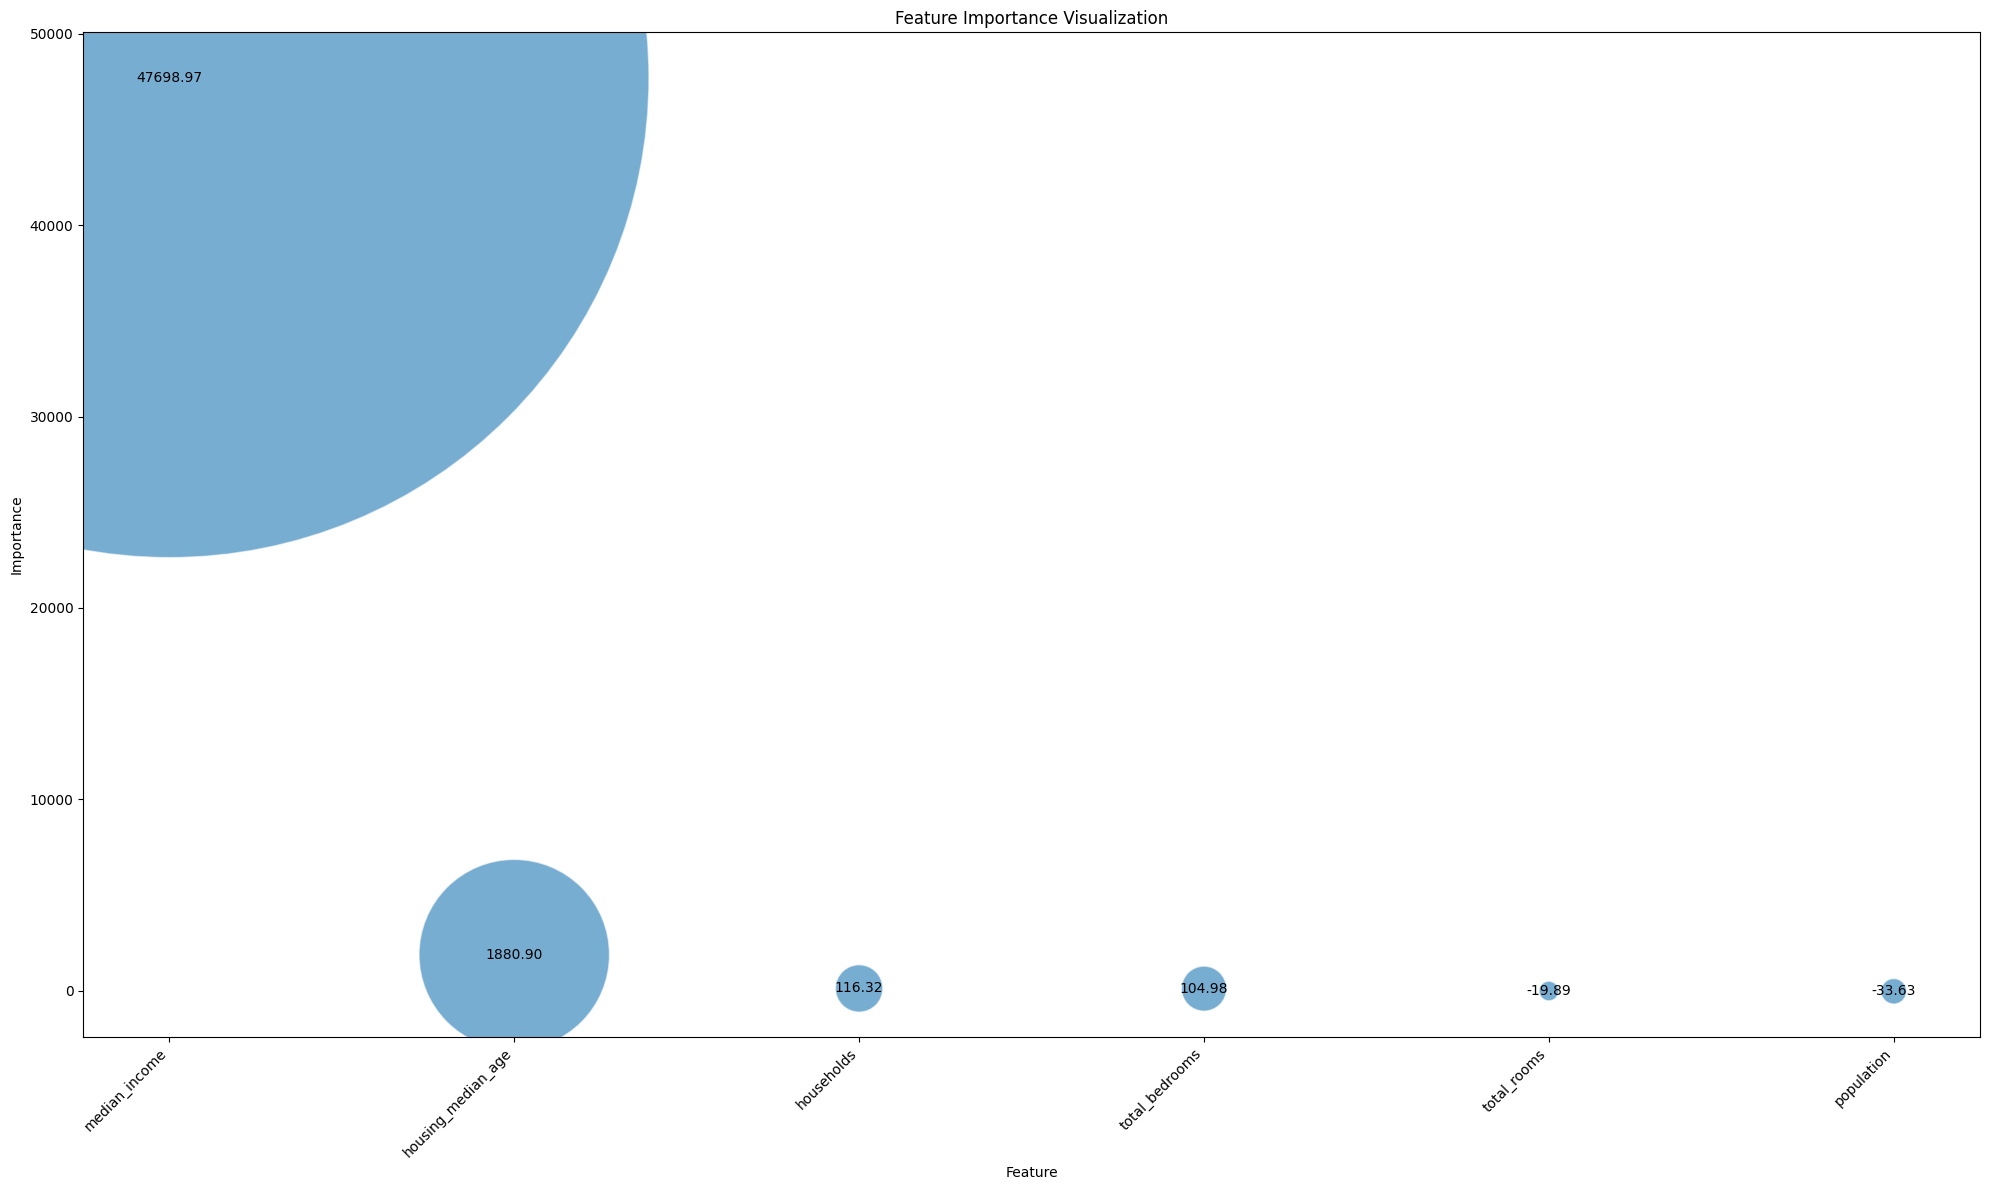


Top factors influencing sales prices:
- median_income: This feature has a positive relationship with house prices and an importance coefficient of 47698.97. A higher value for 'median_income' is likely to give an increase in the resultant purchsed house price.
- housing_median_age: This feature has a positive relationship with house prices and an importance coefficient of 1880.90. A higher value for 'housing_median_age' is likely to give an increase in the resultant purchsed house price.
- households: This feature has a positive relationship with house prices and an importance coefficient of 116.32. A higher value for 'households' is likely to give an increase in the resultant purchsed house price.

Model R-squared score: 0.57
This indicates the proportion of variance in house prices explained by these features.

Top Factors Influencing House Prices:
- median_income: This feature has a positive relationship with house prices and an importance coefficient of 47698.97. A higher value fo

In [30]:

print("""
This was a first analysis to see what factors were most important, although there seemed to be a ceiling on th ehouse prices which might effect the data. .""")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os

# CSV 
file_path = '/home/tomas/GitHub/HandelsAI/KK-kontrol/NBI/K-kontrol-3/housing.csv'  # Replace with your actual file path
output_folder = os.path.dirname(file_path)  # Get the directory of the file
df = pd.read_csv(file_path)

# print("Initial Data Inspection:")
# print(df.head())
# print(df.info())

# nan filter
df.dropna(inplace=True) 

# formatting
numeric_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# unique values for ocean_proximity
unique_ocean_proximity = df['ocean_proximity'].unique()
print("\nUnique values for ocean_proximity:")
print(unique_ocean_proximity)

# Boxplot: median_house_value  vs.  ocean_proximity
plt.figure(figsize=(10, 6))
df.boxplot(column='median_house_value', by='ocean_proximity', grid=False)
plt.title("House Prices by Ocean Proximity")
plt.suptitle("") 
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'house_prices_by_ocean_proximity.png'))
plt.close()

# Correlation
numeric_df = df.select_dtypes(include=['float64', 'int64']) #  only numeric columns
correlation_matrix = numeric_df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Correlation Heatmap   
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'correlation_heatmap.png'))
plt.close()

# Scatter plots 
scatter_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
for feature in scatter_features:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[feature], df['median_house_value'], alpha=0.5)
    plt.title(f"House Prices vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Median House Value")
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, f'house_prices_vs_{feature}.png'))
    plt.close()

# Age Analysis
plt.figure(figsize=(8, 5))
df['housing_median_age'].plot(kind='hist', bins=20, title='Age Distribution of Houses')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'housing_age_distribution.png'))
plt.close()

# income analysis
plt.figure(figsize=(8, 5))
df['median_income'].plot(kind='hist', bins=20, title='Income Distribution')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'income_distribution.png'))
plt.close()

# regression analysis
X = df[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = df['median_house_value']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train LinearRegression  
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate 
r2 = r2_score(y_test, y_pred)
print(f"\nLinear Regression R-squared score: {r2:.2f}")

# featureimportance
coefficients = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(coefficients)

# Bubbleplot  featureimportance 
coefficients['Bubble_Size'] = abs(coefficients['Importance']) * 10
# Scatterplot
plt.figure(figsize=(20, 12))
plt.scatter(
    x=coefficients['Feature'],
    y=coefficients['Importance'],
    s=coefficients['Bubble_Size'], 
    alpha=0.6,
    edgecolors='w'
)
plt.title("Feature Importance Visualization")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# label bubbles with importance values
for i, row in coefficients.iterrows():
    plt.text(row['Feature'], row['Importance'], f"{row['Importance']:.2f}", ha='center', va='center')

# save  plot
bubble_plot_path = os.path.join(output_folder, 'feature_importance_bubble_plot.png')
plt.savefig(bubble_plot_path)
plt.show()


# featureimportance
coefficients = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_}).sort_values(by='Importance', ascending=False)

# Imost significant factors
top_features = coefficients.sort_values(by='Importance', key=abs, ascending=False).head(3)
print("\nTop factors influencing sales prices:")
for idx, row in top_features.iterrows():
    direction = "positive" if row['Importance'] > 0 else "negative"
    print(
        f"- {row['Feature']}: This feature has a {direction} relationship with house prices "
        f"and an importance coefficient of {row['Importance']:.2f}. "
        f"A higher value for '{row['Feature']}' is likely to give an {'increase' if direction == 'positive' else 'decrease'} in the resultant purchsed house price."
    )

print(f"\nModel R-squared score: {r2:.2f}")
print("This indicates the proportion of variance in house prices explained by these features.")


# featureimportance
coefficients = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_}).sort_values(by='Importance', ascending=False)

# Imost significant factors
top_features = coefficients.sort_values(by='Importance', key=abs, ascending=False).head(3)
print("\nTop Factors Influencing House Prices:")
for idx, row in top_features.iterrows():
    direction = "positive" if row['Importance'] > 0 else "negative"
    print(
        f"- {row['Feature']}: This feature has a {direction} relationship with house prices "
        f"and an importance coefficient of {row['Importance']:.2f}. "
        f"A higher value for '{row['Feature']}' is likely to {'increase' if direction == 'positive' else 'decrease'} house prices."
    )

print(f"\nModel R-squared score: {r2:.2f}")
print("This indicates the proportion of variance in house prices explained by the selected features.")

# encode 'ocean_proximity' to dummy variables
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# features and target
X = df_encoded.drop(columns=['median_house_value'])
y = df_encoded['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# trainLinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

# evaluate model
r2 = r2_score(y_test, y_pred)
print(f"\nLinear Regression R-squared score: {r2:.2f}")

# featureimportance
coefficients = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_}).sort_values(by='Importance', ascending=False)

# separate /  rank  'ocean_proximity' influence 
ocean_proximity_features = coefficients[coefficients['Feature'].str.contains('ocean_proximity')]

print("\nInfluence of Ocean Proximity on house prices:")
for idx, row in ocean_proximity_features.iterrows():
    direction = "positive" if row['Importance'] > 0 else "negative"
    print(
        f"- {row['Feature']}: This category has a {direction} relationship with house prices "
        f"and an importance coefficient of {row['Importance']:.2f}. "
        f"A property in this category is likely to {'increase' if direction == 'positive' else 'decrease'} the resultant  house price."
    )

# most important factors
top_features = coefficients.sort_values(by='Importance', key=abs, ascending=False).head(3)
print("\nTop factors influencing house prices:")
for idx, row in top_features.iterrows():
    direction = "positive" if row['Importance'] > 0 else "negative"
    print(
        f"- {row['Feature']}: This feature has a {direction} relationship with house prices "
        f"and an importance coefficient of {row['Importance']:.2f}. "
        f"A higher value for '{row['Feature']}' is likely to {'increase' if direction == 'positive' else 'decrease'} the resultant house price."
    )

print(f"\nModel R-squared score: {r2:.2f}")
print("This indicates the proportion of variance in house prices explained by the selected features.")


Here I just made simple bar charts for each facotr to see basic correlations. Median income was a clear match.


/tmp/ipykernel_171879/18524271.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby(bins)['median_house_value'].mean()


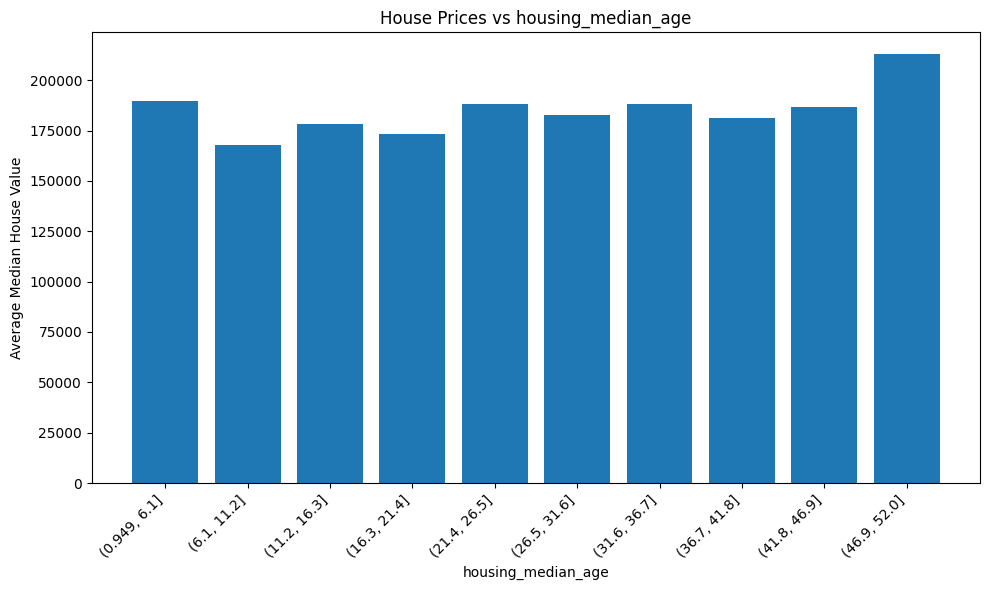

/tmp/ipykernel_171879/18524271.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby(bins)['median_house_value'].mean()


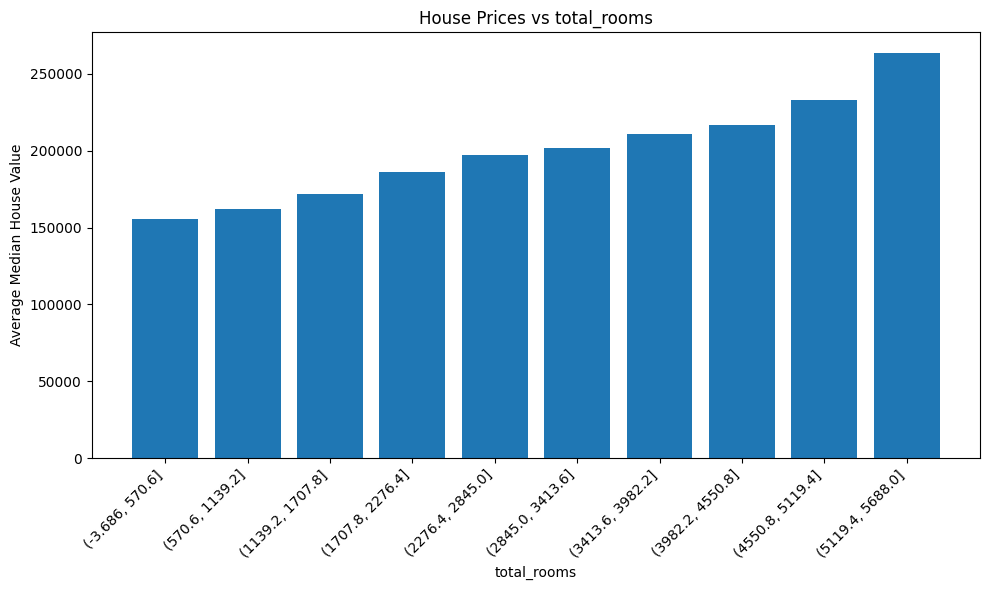

/tmp/ipykernel_171879/18524271.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby(bins)['median_house_value'].mean()


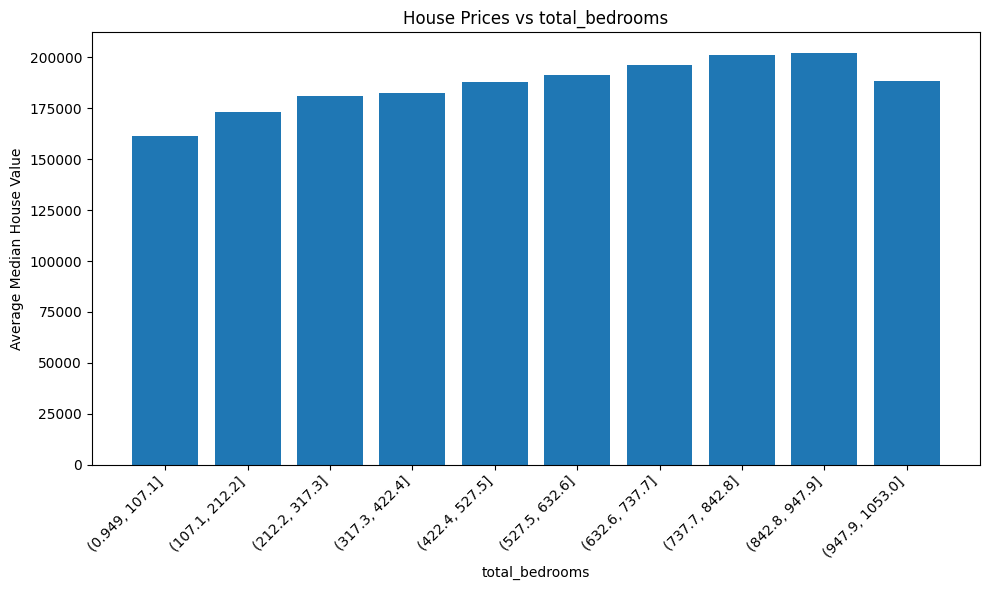

/tmp/ipykernel_171879/18524271.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby(bins)['median_house_value'].mean()


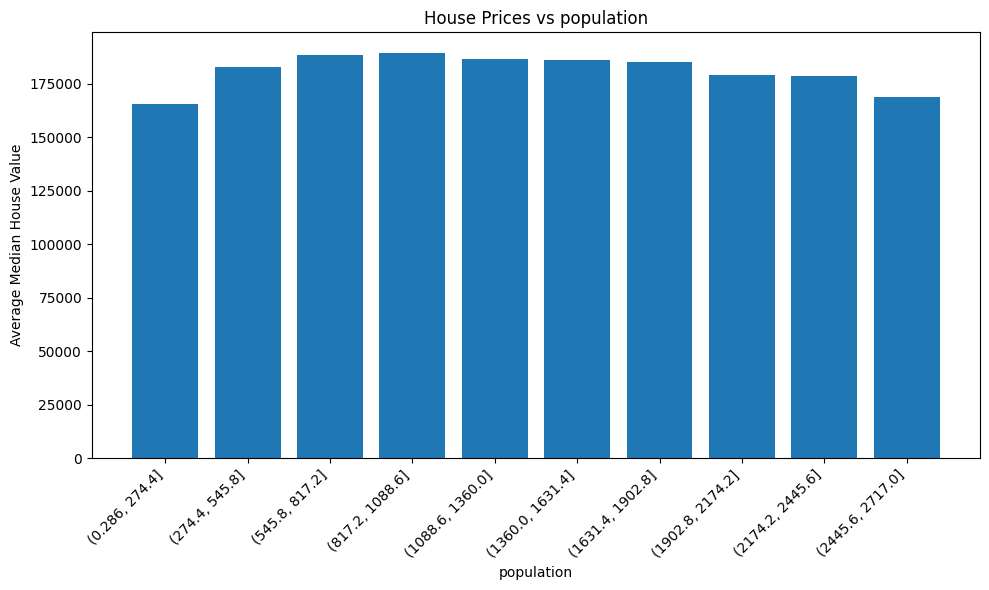

/tmp/ipykernel_171879/18524271.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby(bins)['median_house_value'].mean()


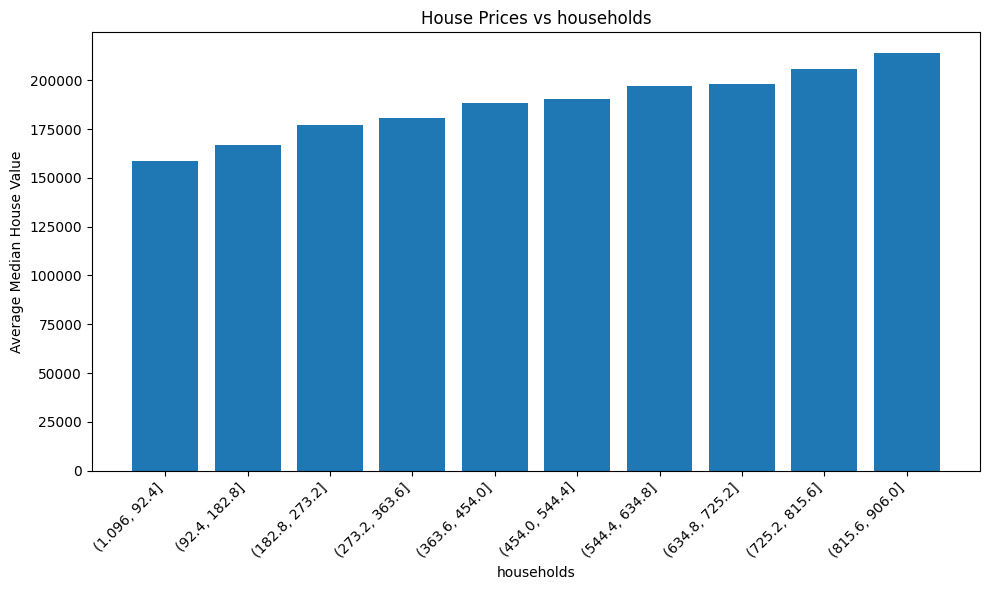

/tmp/ipykernel_171879/18524271.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby(bins)['median_house_value'].mean()


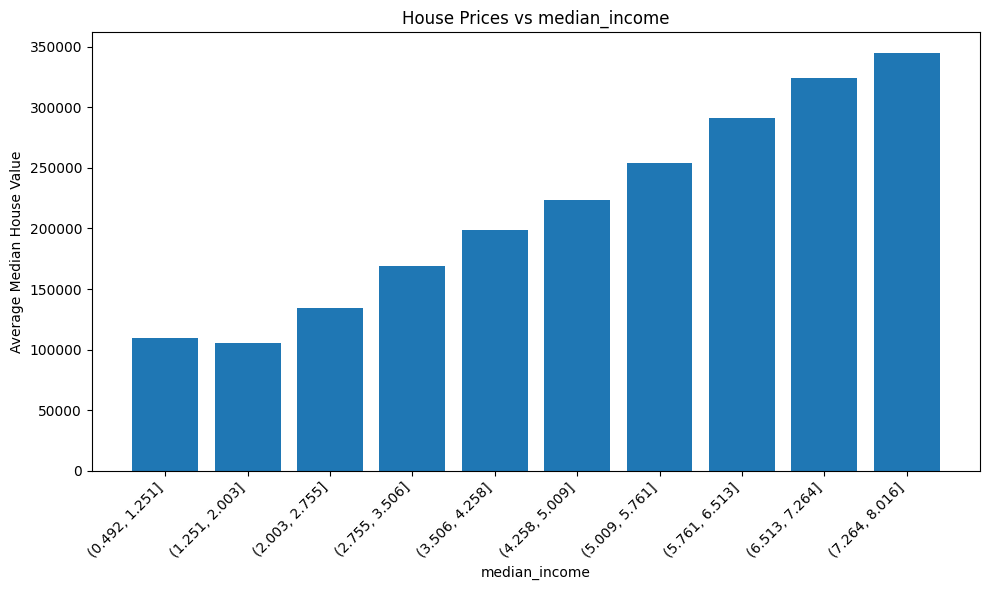

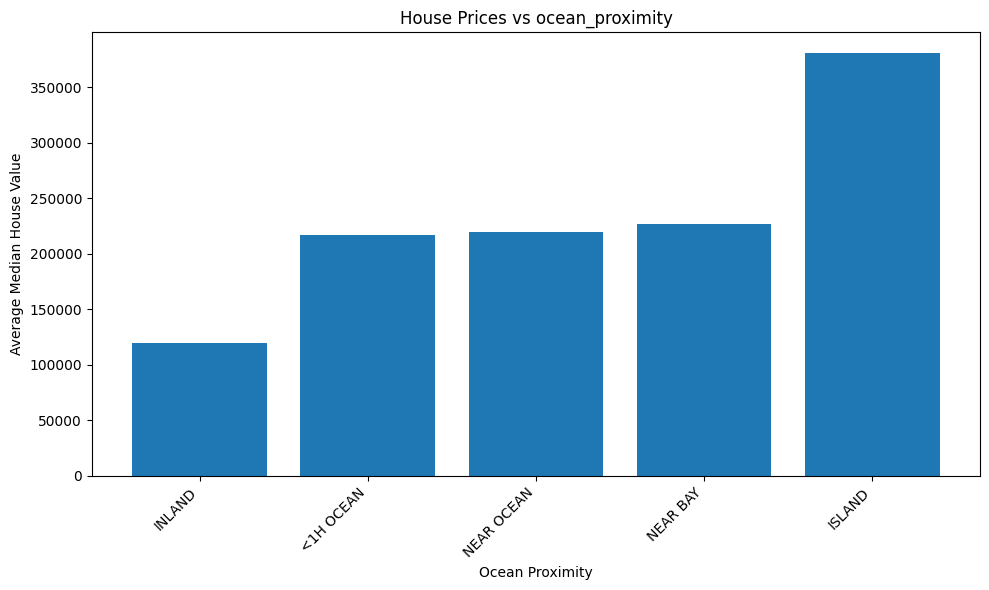

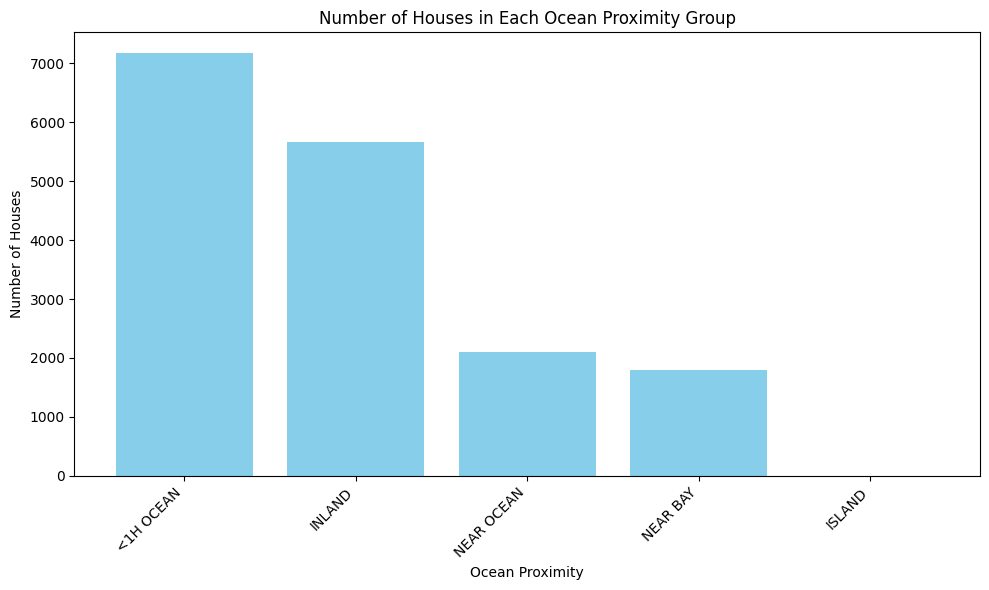

In [29]:

print("""
Here I just made simple bar charts for each facotr to see basic correlations. Median income was a clear match.""")
# bar charts for each factor
factors = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
for factor in factors:
    plt.figure(figsize=(10, 6))
    
    if factor == 'ocean_proximity':
        data = df.groupby(factor)['median_house_value'].mean().sort_values()
        plt.bar(data.index, data.values)
        plt.xlabel("Ocean Proximity")
    else:
        bins = pd.cut(df[factor], bins=10)  # numeric variable binned into 10 
        data = df.groupby(bins)['median_house_value'].mean()
        plt.bar(data.index.astype(str), data.values)
        plt.xlabel(factor)

    plt.ylabel("Average Median House Value")
    plt.title(f"House Prices vs {factor}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.show()

#  bar chart: Number of houses in each ocean proximity group
plt.figure(figsize=(10, 6))
ocean_proximity_counts = df['ocean_proximity'].value_counts()
plt.bar(ocean_proximity_counts.index, ocean_proximity_counts.values, color='skyblue')
plt.title("Number of Houses in Each Ocean Proximity Group")
plt.xlabel("Ocean Proximity")
plt.ylabel("Number of Houses")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Here I grouped the house prices into 5 buckets to see if there was a difference in correlating factors depending on the house value. 


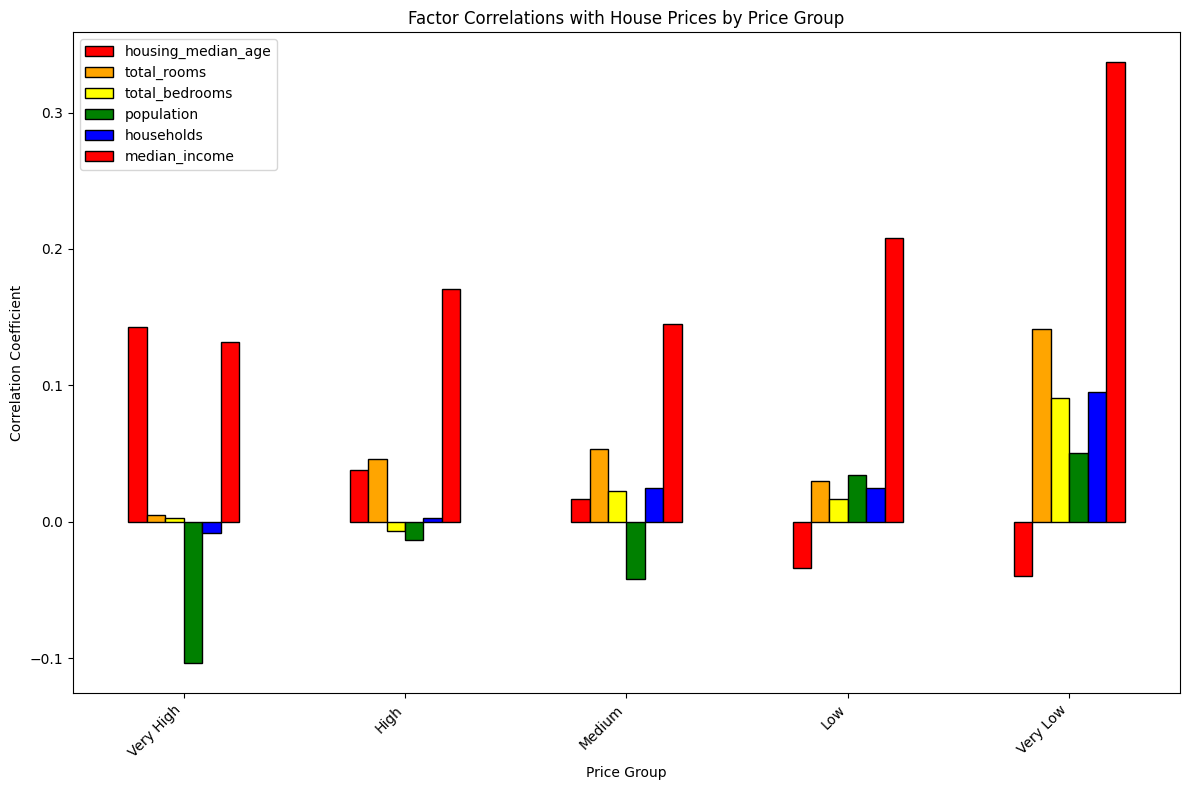

In [26]:
print("""
Here I grouped the house prices into 5 buckets to see if there was a difference in correlating factors depending on the house value. """)
import numpy as np

# group into 5 
df['price_group'] = pd.qcut(df['median_house_value'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# calculate correlations for each price group
correlations_by_group = {}
factors = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

for group in df['price_group'].unique():
    group_data = df[df['price_group'] == group]
    correlations_by_group[group] = group_data[factors].corrwith(group_data['median_house_value'])

# convert to df
correlation_df = pd.DataFrame(correlations_by_group).T
correlation_df.index.name = 'Price Group'

# charts for grouped correlations 
correlation_df.plot(
    kind='bar',
    figsize=(12, 8),
    color=['red', 'orange', 'yellow', 'green', 'blue'],  # Different colors for each group
    edgecolor='black'
)
plt.title("Factor Correlations with House Prices by Price Group")
plt.xlabel("Price Group")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Here I ran the analyses with trendlines just to see graphically what factors had correlation. . 



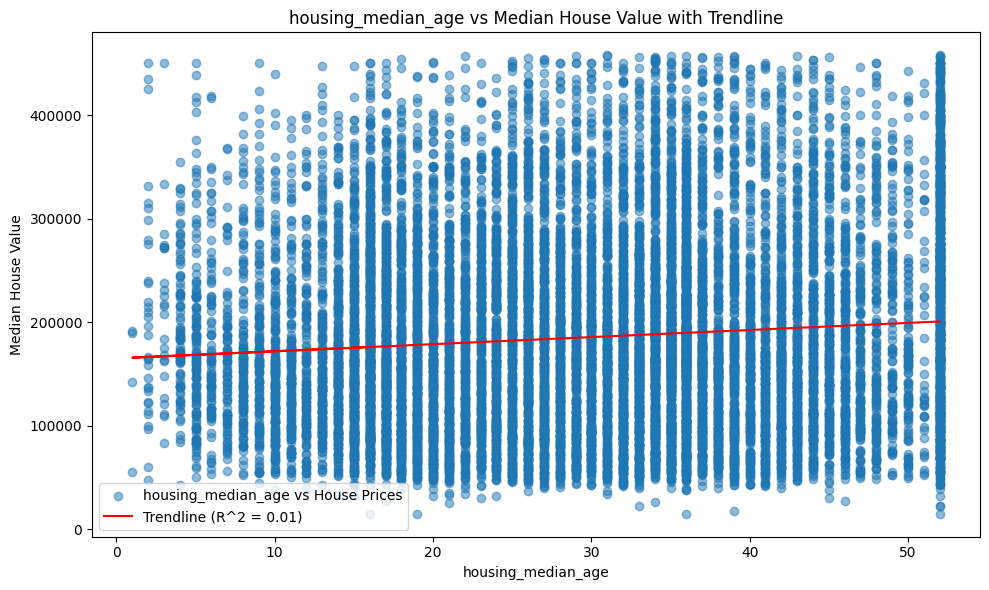

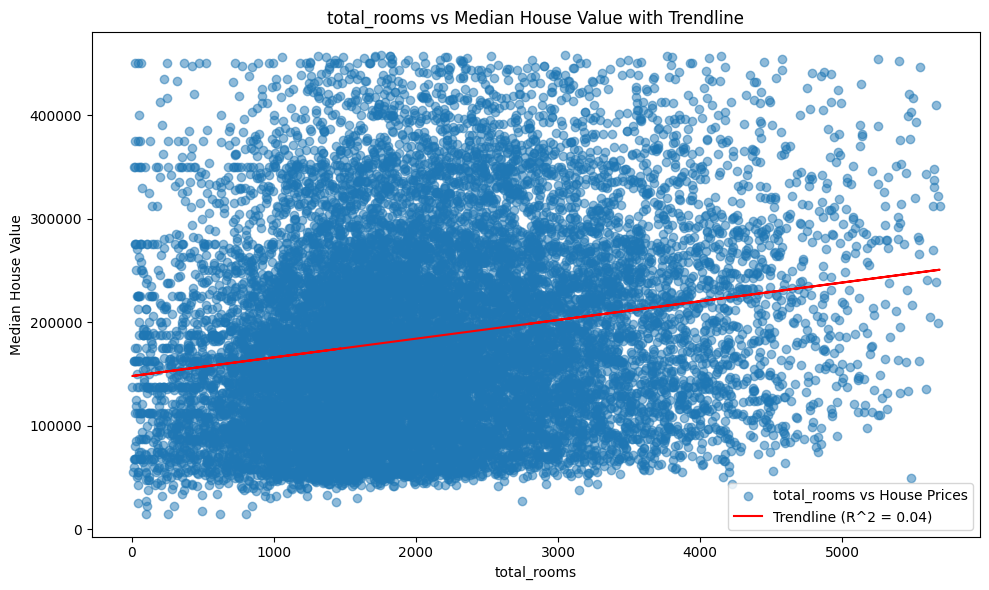

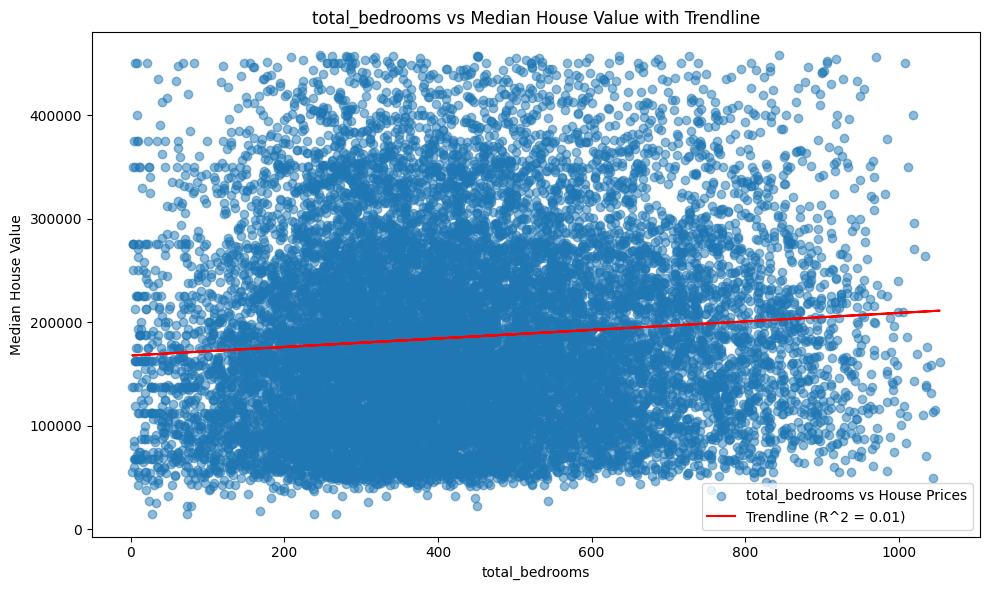

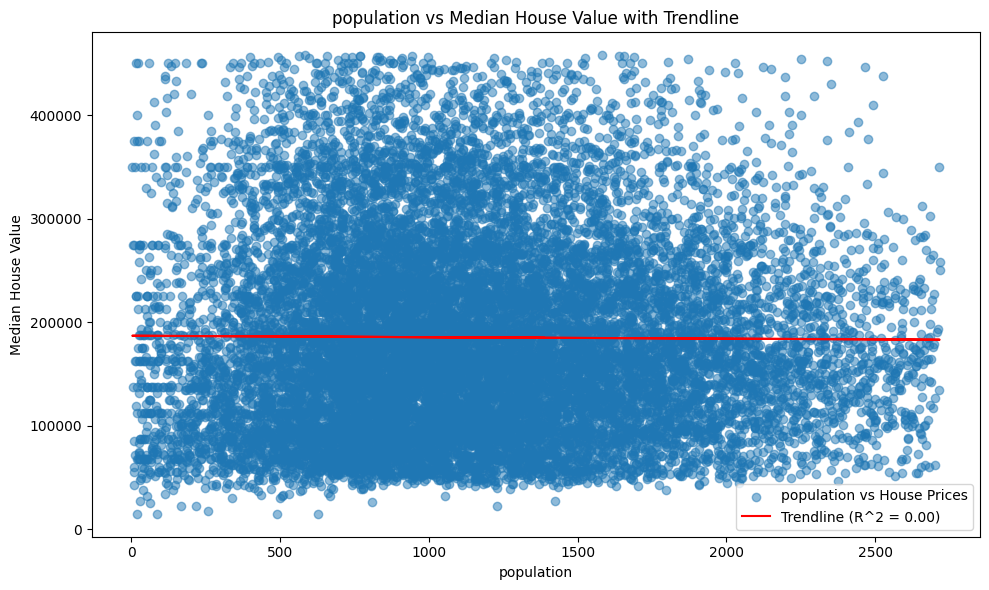

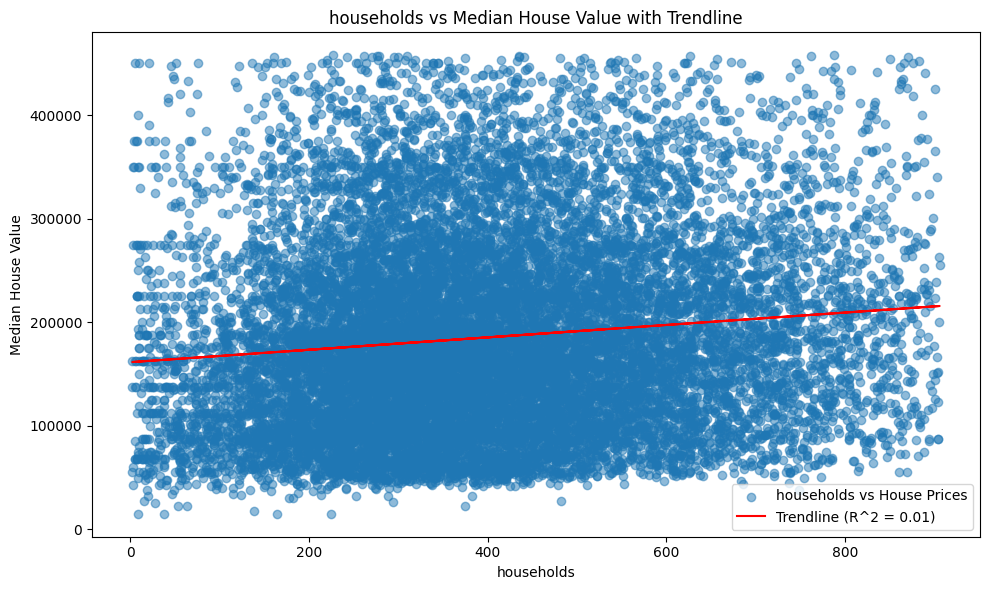

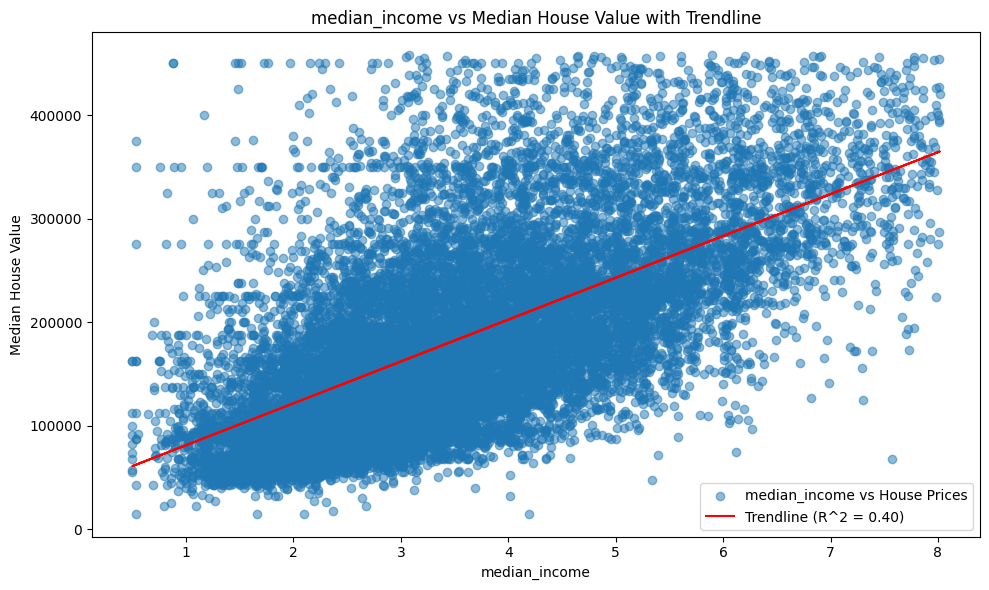

In [27]:
print("""
Here I ran the analyses with trendlines just to see graphically what factors had correlation. . 
""")
from sklearn.linear_model import LinearRegression

# plot factor w/ trendline
factors = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
for factor in factors:
    X = df[[factor]].values.reshape(-1, 1)  # independent variable
    y = df['median_house_value'].values.reshape(-1, 1)  # dependent variable -house prices
    
    # fit LinearRegression
    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)# predictions for trendline
    
    
    r2 = model.score(X, y)# calculate R^2
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.5, label=f'{factor} vs House Prices')
    plt.plot(X, y_pred, color='red', label=f'Trendline (R^2 = {r2:.2f})')
    plt.title(f"{factor} vs Median House Value with Trendline")
    plt.xlabel(factor)
    plt.ylabel("Median House Value")
    plt.legend()
    plt.tight_layout()
    plt.show()



This time I tried to see if filtering out the outliers with IQR would give anything significantly different, but it was more or less the same. 



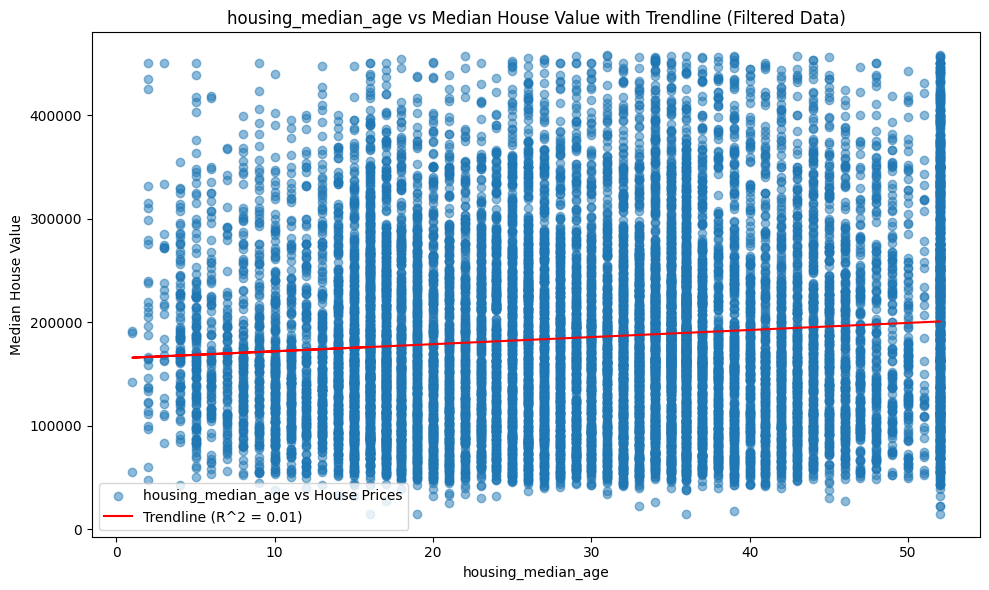

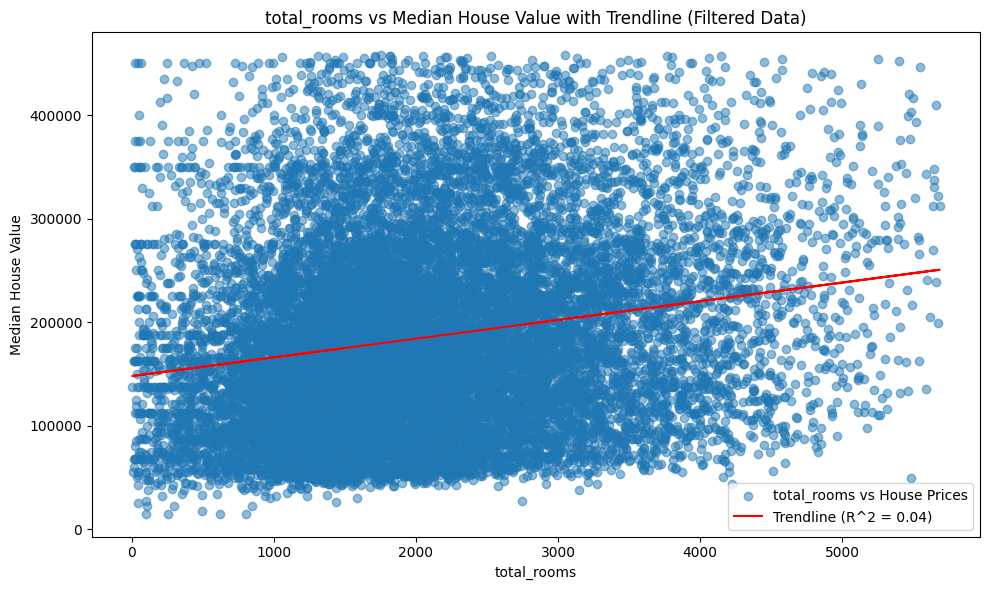

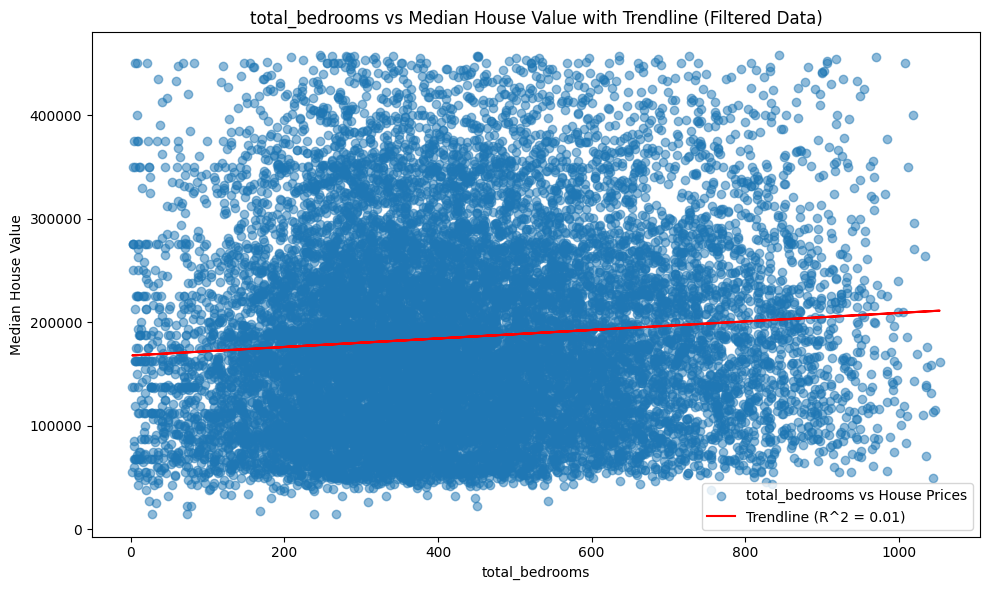

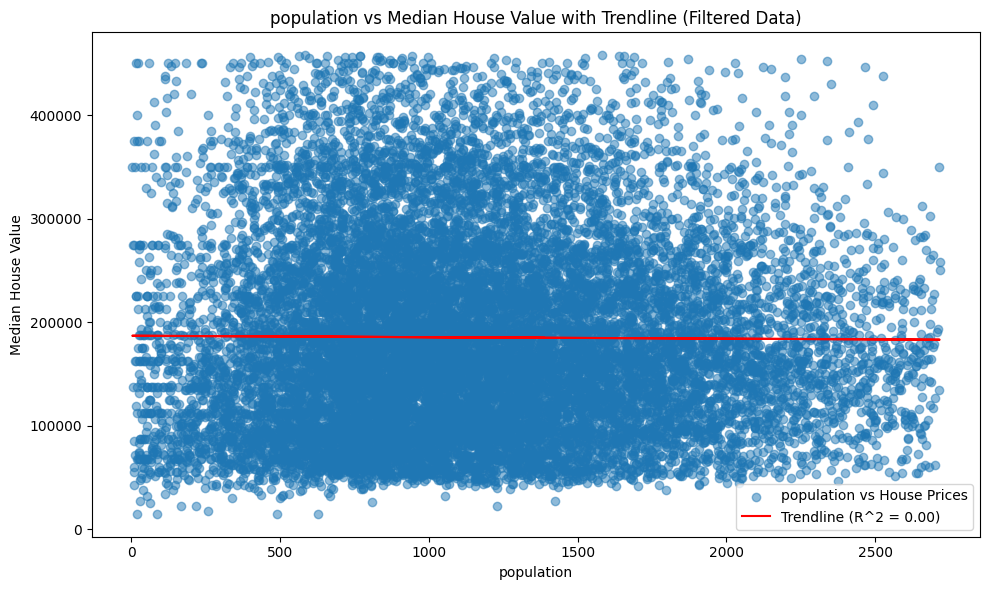

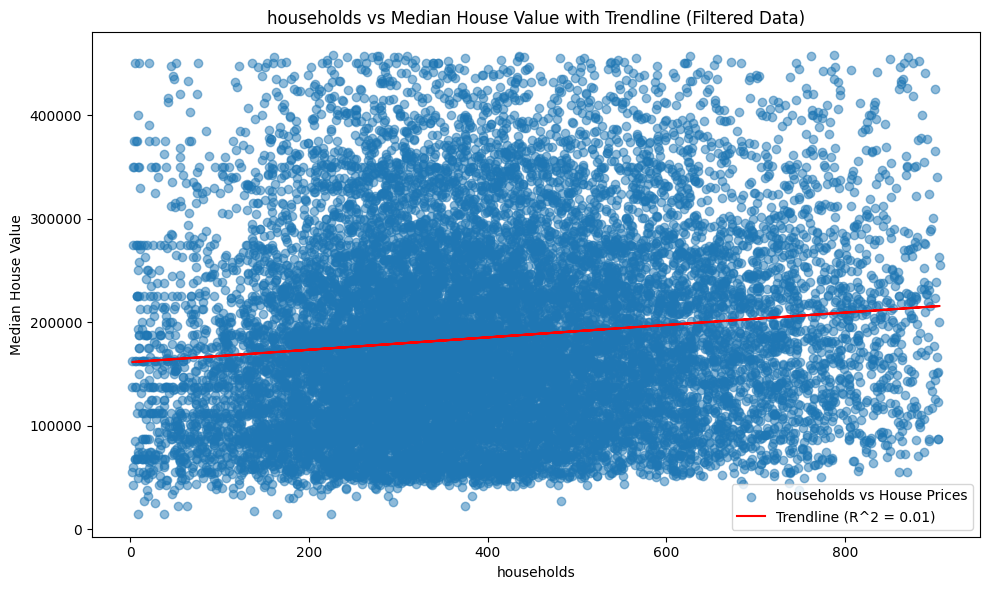

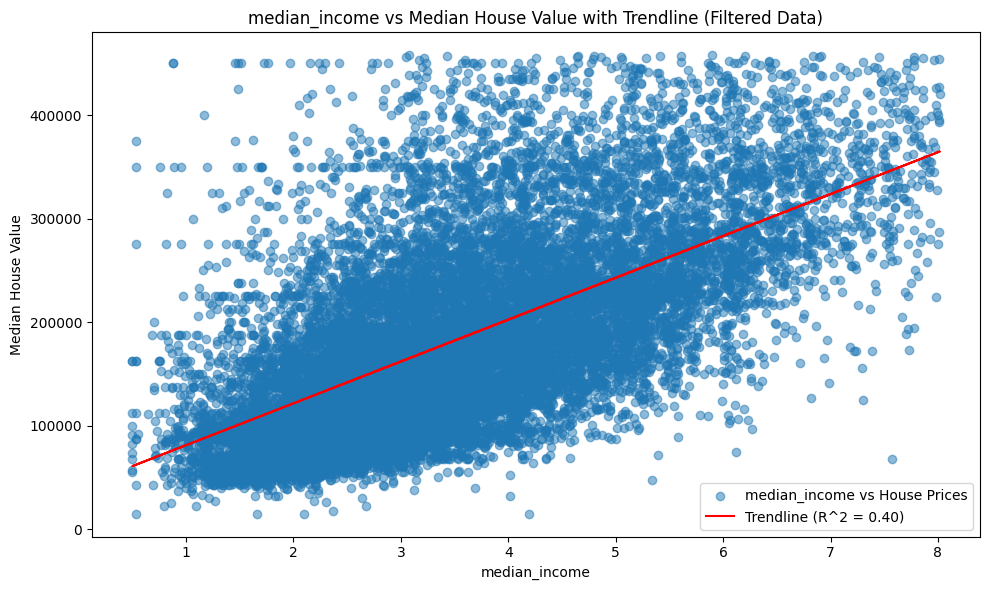

In [25]:
print("""
This time I tried to see if filtering out the outliers with IQR would give anything significantly different, but it was more or less the same. 
""")

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

file_path = '/home/tomas/GitHub/HandelsAI/KK-kontrol/NBI/K-kontrol-3/housing.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Filter outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
columns_to_filter = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
for column in columns_to_filter:
    df = remove_outliers(df, column)

# Scatter plots with trendlines and R^2
factors = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
for factor in factors:
    X = df[[factor]].values.reshape(-1, 1)  
    y = df['median_house_value'].values.reshape(-1, 1)  
    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    
    r2 = model.score(X, y)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.5, label=f'{factor} vs House Prices')
    plt.plot(X, y_pred, color='red', label=f'Trendline (R^2 = {r2:.2f})')
    plt.title(f"{factor} vs Median House Value with Trendline (Filtered Data)")
    plt.xlabel(factor)
    plt.ylabel("Median House Value")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [24]:
print("""
1. Har något varit utmanande i kunskapskontrollen? Om ja, hur har du hanterat det? 

Det var lite klurigt med Mate läxan, men det gick bra. 

2. Vilket betyg anser du att du ska ha och varför? 

Jag anser att jag ska ha ett bra betyg eftersom jag har visat en stark förståelse för materialet, hanterat utmaningar framgångsrikt och levererat genomtänkta lösningar på alla uppgifter.

3. Något du vill lyfta fram till Antonio? 

Nej, det gick jättebra. 
""")



1. Har något varit utmanande i kunskapskontrollen? Om ja, hur har du hanterat det? 

Det var lite klurigt med Mate läxan, men det gick bra. 

2. Vilket betyg anser du att du ska ha och varför? 

Jag anser att jag ska ha ett bra betyg eftersom jag har visat en stark förståelse för materialet, hanterat utmaningar framgångsrikt och levererat genomtänkta lösningar på alla uppgifter.

3. Något du vill lyfta fram till Antonio? 

Nej, det gick jättebra. 

